<a href="https://colab.research.google.com/github/nichohagan/Data_Preprocessing_with_Python/blob/main/Macro_Economic_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Macro Economic Indicators Project 
Goal: The goal is to clean this datset of set of macroeconomic indicators to be used later for price prediction task

In [ ]:
# import packages
#!pip install pandas
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#### Data Exploration -- Reading the Dataset

In [ ]:
data = pd.read_csv('macro-1.csv')
data

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#pd.set_option('display.max_rows', None) #show all the rows
#pd.set_option('display.max_columns', None) #show all the rows

In [ ]:
data.isnull()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,False,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,True,False,False,True
1,False,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,True,False,False,True
2,False,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,True,False,False,True
3,False,False,True,True,True,True,True,True,True,False,...,False,False,False,False,False,True,True,False,False,True
4,False,False,True,True,True,True,True,True,True,False,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2480,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2481,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2482,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
print(data.shape)
print(data.dtypes)

(2484, 100)
timestamp                       object
oil_urals                      float64
gdp_quart                      float64
gdp_quart_growth               float64
cpi                            float64
                                ...   
bandwidth_sports               float64
population_reg_sports_share    float64
students_reg_sports_share      float64
apartment_build                float64
apartment_fund_sqm             float64
Length: 100, dtype: object


In [ ]:
#data.drop[:,0-49,axis=1,inplace=True]

In [ ]:
# selecting numeric columns
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
print(numeric_cols)

['oil_urals' 'gdp_quart' 'gdp_quart_growth' 'cpi' 'ppi' 'gdp_deflator'
 'balance_trade' 'balance_trade_growth' 'usdrub' 'eurrub' 'brent'
 'net_capital_export' 'gdp_annual' 'gdp_annual_growth'
 'average_provision_of_build_contract'
 'average_provision_of_build_contract_moscow' 'rts' 'micex'
 'micex_rgbi_tr' 'micex_cbi_tr' 'deposits_value' 'deposits_growth'
 'deposits_rate' 'mortgage_value' 'mortgage_growth' 'mortgage_rate' 'grp'
 'grp_growth' 'income_per_cap' 'real_dispos_income_per_cap_growth'
 'salary' 'salary_growth' 'fixed_basket' 'retail_trade_turnover'
 'retail_trade_turnover_per_cap' 'retail_trade_turnover_growth'
 'labor_force' 'unemployment' 'employment' 'invest_fixed_capital_per_cap'
 'invest_fixed_assets' 'profitable_enterpr_share'
 'unprofitable_enterpr_share' 'share_own_revenues' 'overdue_wages_per_cap'
 'fin_res_per_cap' 'marriages_per_1000_cap' 'divorce_rate'
 'construction_value' 'invest_fixed_assets_phys' 'pop_natural_increase'
 'pop_migration' 'pop_total_inc' 'childbir

In [ ]:
##How many numeric columns were selected
numeric_cols.shape

(97,)

In [ ]:
# selecting non numeric columns
data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values
print(non_numeric_cols)

['timestamp' 'modern_education_share' 'old_education_build_share']


In [ ]:
#data['timestamp']
#data['modern_education_share']
data['old_education_build_share']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2479    NaN
2480    NaN
2481    NaN
2482    NaN
2483    NaN
Name: old_education_build_share, Length: 2484, dtype: object

In [ ]:
#data['timestamp'].str.replace("-","").astype(int)
#data['modern_education_share'].str.replace(",","")#.astype(int)
data['old_education_build_share'].str.replace(",","")#.astype(int)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2479    NaN
2480    NaN
2481    NaN
2482    NaN
2483    NaN
Name: old_education_build_share, Length: 2484, dtype: object

In [ ]:
##How many non-numeric columns were selected
#non_numeric_cols.shape

(4,)

Observation: 
- The training dataset has 2484 rows and 100 columns
- There are 96 numeric attributes, 4 non-numeric attributes
THese are all useful insights to be used later

#### Data Cleansing

1. **Missing Data**

<AxesSubplot:>

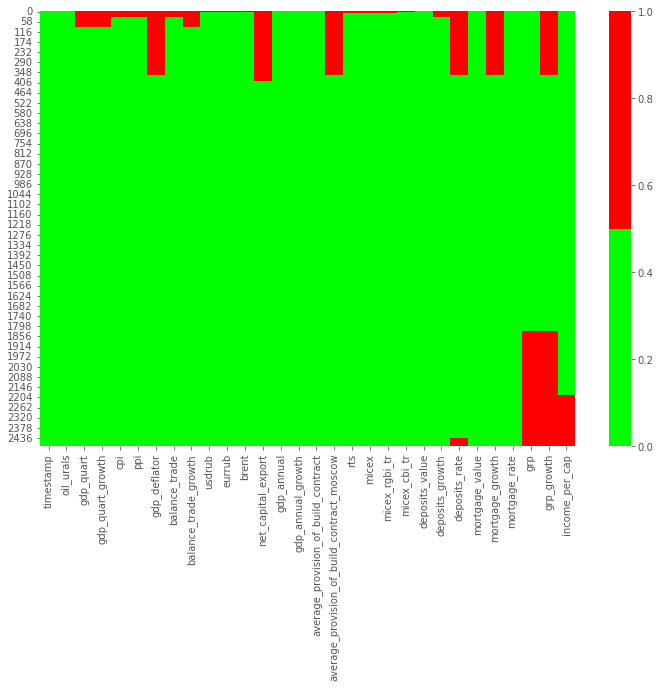

In [ ]:
#1. Heatmap visualization
cols = data.columns[:30] # first 30 columns
colours = ['#00FF00', '#FF0000'] # specify the colours - red is missing,green is not missing 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
    

In [ ]:

#2.% of missing
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

timestamp - 0%
oil_urals - 0%
gdp_quart - 4%
gdp_quart_growth - 4%
cpi - 1%
ppi - 1%
gdp_deflator - 15%
balance_trade - 1%
balance_trade_growth - 4%
usdrub - 0%
eurrub - 0%
brent - 0%
net_capital_export - 16%
gdp_annual - 0%
gdp_annual_growth - 0%
average_provision_of_build_contract - 0%
average_provision_of_build_contract_moscow - 15%
rts - 0%
micex - 0%
micex_rgbi_tr - 0%
micex_cbi_tr - 0%
deposits_value - 0%
deposits_growth - 1%
deposits_rate - 17%
mortgage_value - 0%
mortgage_growth - 15%
mortgage_rate - 0%
grp - 26%
grp_growth - 41%
income_per_cap - 12%
real_dispos_income_per_cap_growth - 26%
salary - 12%
salary_growth - 26%
fixed_basket - 0%
retail_trade_turnover - 12%
retail_trade_turnover_per_cap - 12%
retail_trade_turnover_growth - 12%
labor_force - 12%
unemployment - 12%
employment - 12%
invest_fixed_capital_per_cap - 12%
invest_fixed_assets - 12%
profitable_enterpr_share - 26%
unprofitable_enterpr_share - 26%
share_own_revenues - 26%
overdue_wages_per_cap - 26%
fin_res_per_c

##### Dealing with the missing values

##### Imputting missing values with median (when data is numeric), mode (if data is categorical)

In [ ]:
#imputting missing values across entire dataset
# impute the missing values and create the missing value indicator variables 
#for each numeric column
data.replace(',','', inplace=True)
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
#print(numeric_cols)

for col in numeric_cols:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    #print(num_missing)
    
# only do the imputation for the columns that have missing values 
    if num_missing > 0:
        print('imputing missing values for: {}'.format(col))
        #data['{}_ismissing'.format(col)] = missing  #using the 'ismissing function' in python
        data[col].replace(np.NaN, data[col].median(),inplace=True)
        #OR
        #data[col].fillna(data[col].mode(),inplace=True)
        
        #med = data[col].median()
        #data[col] = data[col].fillna(med) #fillna() function is used to fill NA/NaN values
    
        #data.fillna(data.median(), inplace=True)

imputing missing values for: gdp_quart
imputing missing values for: gdp_quart_growth
imputing missing values for: cpi
imputing missing values for: ppi
imputing missing values for: gdp_deflator
imputing missing values for: balance_trade
imputing missing values for: balance_trade_growth
imputing missing values for: usdrub
imputing missing values for: eurrub
imputing missing values for: brent
imputing missing values for: net_capital_export
imputing missing values for: average_provision_of_build_contract_moscow
imputing missing values for: rts
imputing missing values for: micex
imputing missing values for: micex_rgbi_tr
imputing missing values for: micex_cbi_tr
imputing missing values for: deposits_growth
imputing missing values for: deposits_rate
imputing missing values for: mortgage_growth
imputing missing values for: grp
imputing missing values for: grp_growth
imputing missing values for: income_per_cap
imputing missing values for: real_dispos_income_per_cap_growth
imputing missing valu

In [ ]:
data

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1000,17442.1,1.3,393.0,473.5,108.299,16.041,10.5,32.3165,...,690.0,6221.0,527.0,0.4100,993.0,329348.0,23.01,63.03,22825.0,230310.0
1,2010-01-02,76.1000,17442.1,1.3,393.0,473.5,108.299,16.041,10.5,32.3165,...,690.0,6221.0,527.0,0.4100,993.0,329348.0,23.01,63.03,22825.0,230310.0
2,2010-01-03,76.1000,17442.1,1.3,393.0,473.5,108.299,16.041,10.5,32.3165,...,690.0,6221.0,527.0,0.4100,993.0,329348.0,23.01,63.03,22825.0,230310.0
3,2010-01-04,76.1000,17442.1,1.3,393.0,473.5,108.299,16.041,10.5,29.9050,...,690.0,6221.0,527.0,0.4100,993.0,329348.0,23.01,63.03,22825.0,230310.0
4,2010-01-05,76.1000,17442.1,1.3,393.0,473.5,108.299,16.041,10.5,29.8360,...,690.0,6221.0,527.0,0.4100,993.0,329348.0,23.01,63.03,22825.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.160,5.823,2.6,62.9573,...,480.5,8522.0,603.0,0.4507,1309.0,329348.0,23.01,67.85,42551.0,230310.0
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.160,5.823,2.6,62.9573,...,480.5,8522.0,603.0,0.4507,1309.0,329348.0,23.01,67.85,42551.0,230310.0
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.160,5.823,2.6,63.0856,...,480.5,8522.0,603.0,0.4507,1309.0,329348.0,23.01,67.85,42551.0,230310.0
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.160,5.823,2.6,62.9512,...,480.5,8522.0,603.0,0.4507,1309.0,329348.0,23.01,67.85,42551.0,230310.0


##### Imputing missing value for non-numeric attributes

In [ ]:
# impute the missing values and create the missing value indicator variables for each non-numeric
data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

for col in non_numeric_cols:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    #print(num_missing)

    # only do the imputation for the columns that have missing values
    if num_missing > 0:           
        print('imputing missing values for: {}'.format(col))
        top = data[col].describe()['top']
        data[col].fillna(top)#,inplace=True)
        #data['{}_ismissing'.format(col)] = missing

        #mode = data[col].describe()['top'] # impute with the most frequent value.i.e. 'mode' using the 'top' function
        #data[col] = data[col].fillna(mode)


imputing missing values for: modern_education_share
imputing missing values for: old_education_build_share


In [ ]:
data

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1000,17442.1,1.3,393.0,473.5,108.299,16.041,10.5,32.3165,...,690.0,6221.0,527.0,0.4100,993.0,329348.0,23.01,63.03,22825.0,230310.0
1,2010-01-02,76.1000,17442.1,1.3,393.0,473.5,108.299,16.041,10.5,32.3165,...,690.0,6221.0,527.0,0.4100,993.0,329348.0,23.01,63.03,22825.0,230310.0
2,2010-01-03,76.1000,17442.1,1.3,393.0,473.5,108.299,16.041,10.5,32.3165,...,690.0,6221.0,527.0,0.4100,993.0,329348.0,23.01,63.03,22825.0,230310.0
3,2010-01-04,76.1000,17442.1,1.3,393.0,473.5,108.299,16.041,10.5,29.9050,...,690.0,6221.0,527.0,0.4100,993.0,329348.0,23.01,63.03,22825.0,230310.0
4,2010-01-05,76.1000,17442.1,1.3,393.0,473.5,108.299,16.041,10.5,29.8360,...,690.0,6221.0,527.0,0.4100,993.0,329348.0,23.01,63.03,22825.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.160,5.823,2.6,62.9573,...,480.5,8522.0,603.0,0.4507,1309.0,329348.0,23.01,67.85,42551.0,230310.0
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.160,5.823,2.6,62.9573,...,480.5,8522.0,603.0,0.4507,1309.0,329348.0,23.01,67.85,42551.0,230310.0
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.160,5.823,2.6,63.0856,...,480.5,8522.0,603.0,0.4507,1309.0,329348.0,23.01,67.85,42551.0,230310.0
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.160,5.823,2.6,62.9512,...,480.5,8522.0,603.0,0.4507,1309.0,329348.0,23.01,67.85,42551.0,230310.0


In [ ]:
#Checking the new results after cleansing
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

timestamp - 0%
oil_urals - 0%
gdp_quart - 0%
gdp_quart_growth - 0%
cpi - 0%
ppi - 0%
gdp_deflator - 0%
balance_trade - 0%
balance_trade_growth - 0%
usdrub - 0%
eurrub - 0%
brent - 0%
net_capital_export - 0%
gdp_annual - 0%
gdp_annual_growth - 0%
average_provision_of_build_contract - 0%
average_provision_of_build_contract_moscow - 0%
rts - 0%
micex - 0%
micex_rgbi_tr - 0%
micex_cbi_tr - 0%
deposits_value - 0%
deposits_growth - 0%
deposits_rate - 0%
mortgage_value - 0%
mortgage_growth - 0%
mortgage_rate - 0%
grp - 0%
grp_growth - 0%
income_per_cap - 0%
real_dispos_income_per_cap_growth - 0%
salary - 0%
salary_growth - 0%
fixed_basket - 0%
retail_trade_turnover - 0%
retail_trade_turnover_per_cap - 0%
retail_trade_turnover_growth - 0%
labor_force - 0%
unemployment - 0%
employment - 0%
invest_fixed_capital_per_cap - 0%
invest_fixed_assets - 0%
profitable_enterpr_share - 0%
unprofitable_enterpr_share - 0%
share_own_revenues - 0%
overdue_wages_per_cap - 0%
fin_res_per_cap - 0%
marriages_per_1

In [ ]:
#the following are number with ',' and null values could not be replaced
#child_on_acc_pre_school - 26%
#modern_education_share - 56%
#old_education_build_share - 56%
print(data["modern_education_share"])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2479    NaN
2480    NaN
2481    NaN
2482    NaN
2483    NaN
Name: modern_education_share, Length: 2484, dtype: object
